In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from utils import plot, read_ucm_params_kalibr, initRectifyMap, equirectangular_projection, rotate_180, rotate_cw_90

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]

In [3]:
params_file = '../../config/camchain-2019-06-11-14-36-07.yaml'
xi_bb, K_bb, D_bb = read_ucm_params_kalibr(params_file, 'cam0')
xi_bf, K_bf, D_bf = read_ucm_params_kalibr(params_file, 'cam1')
xi_tb, K_tb, D_tb = read_ucm_params_kalibr(params_file, 'cam2')
xi_tf, K_tf, D_tf = read_ucm_params_kalibr(params_file, 'cam3')

In [4]:
map1_bf, map2_bf = initRectifyMap(K_bf, D_bf, xi_bf)
map1_bb, map2_bb = initRectifyMap(K_bb, D_bb, xi_bb)
map1_tf, map2_tf = initRectifyMap(K_tf, D_tf, xi_tf)
map1_tb, map2_tb = initRectifyMap(K_tb, D_tb, xi_tb)

Maps are used for applying a generic geometrical transformation to an image.

The function remap transforms the source image using the specified map:

\begin{equation*}
\mathtt{dst}(x,y) = \mathtt{src}(map_x(x,y),map_y(x,y))
\end{equation*}

**map1**	The first map of x values

**map2**	The second map of y values

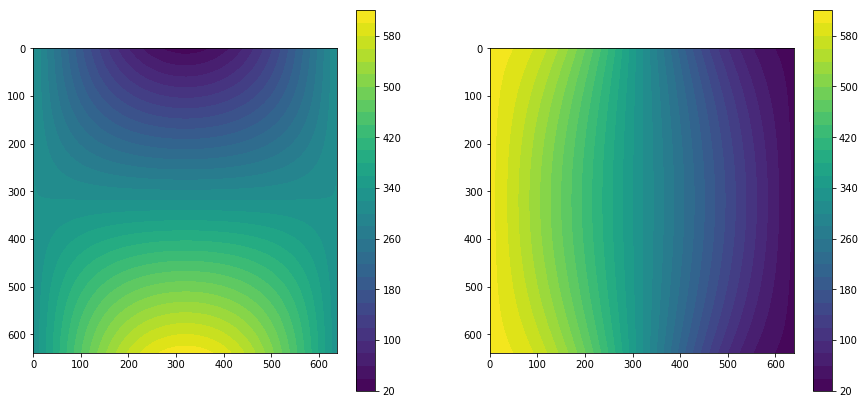

In [5]:
matplotlib.rcParams['figure.figsize'] = [15, 7]
plt.subplot(121); plt.contourf(map1_tf, 32); plt.gca().invert_yaxis(); plt.axis('scaled'); plt.colorbar();
plt.subplot(122); plt.contourf(map2_tf, 32); plt.gca().invert_yaxis(); plt.axis('scaled'); plt.colorbar();

In [6]:
image_file = 'top0005.png'
image = cv2.imread(image_file)
(rows,cols,channels) = image.shape
image_size = rows
top_front_img = image[0:image_size, 0:image_size]
top_back_img  = image[0:image_size, image_size:2*image_size]

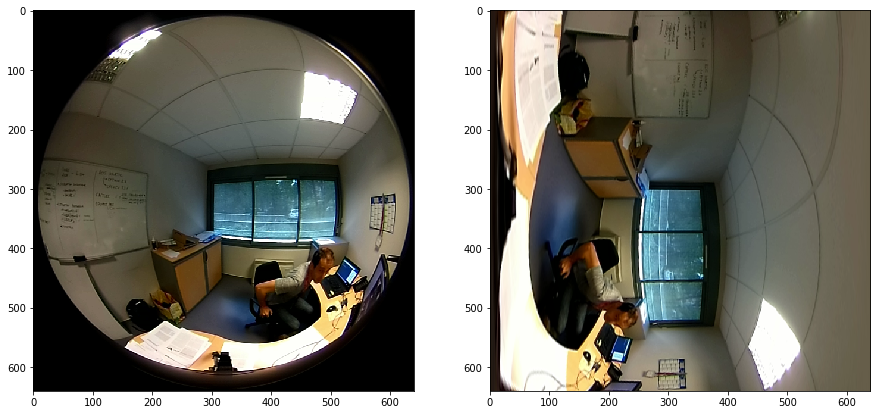

In [7]:
plt.subplot(121); plot(top_front_img);
top_front_eqimg = equirectangular_projection(top_front_img, map1_tf, map2_tf)
plt.subplot(122); plot(rotate_cw_90(top_front_eqimg));

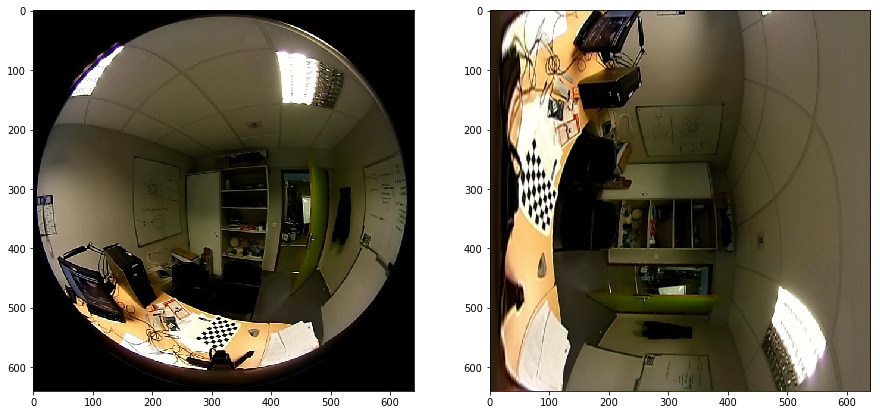

In [8]:
plt.subplot(121); plot(top_back_img);
top_back_eqimg = equirectangular_projection(top_back_img, map1_tb, map2_tb)
plt.subplot(122); plot(rotate_cw_90(top_back_eqimg));

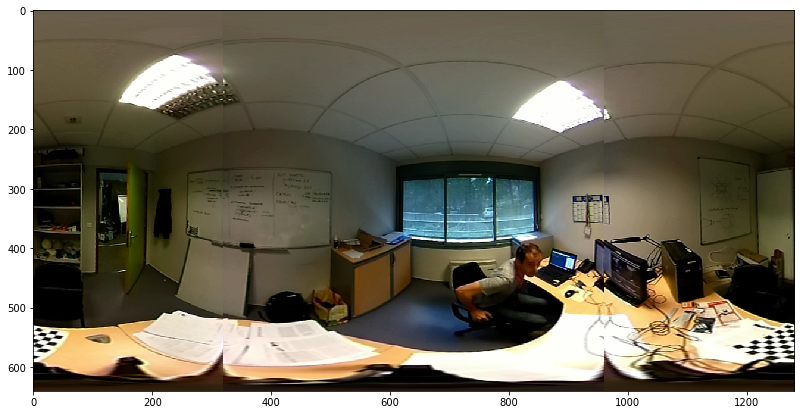

In [9]:
top_both_eqimg = np.concatenate((top_front_eqimg, top_back_eqimg), axis=1)
top_panorama = np.roll(top_both_eqimg, 320, axis=1)
plot(top_panorama);

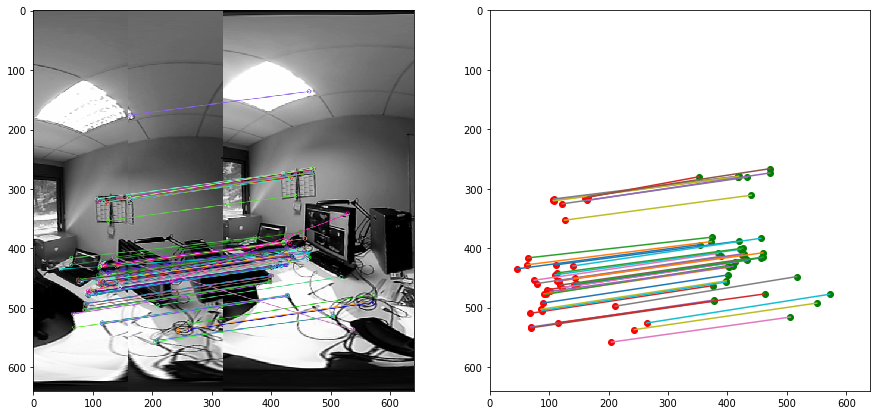

In [11]:
p_tfb = np.load('p_tfb.npy')

tpt = p_tfb[:,0:2]
bpt = p_tfb[:,2:4]

dy = tpt[:,1]-bpt[:,1]
idx = np.logical_and(dy>25, dy<50)
p_tfb = p_tfb[idx,:]

tpt = p_tfb[:,0:2]
bpt = p_tfb[:,2:4]

matplotlib.rcParams['figure.figsize'] = [15, 15]
plt.subplot(121); plt.imshow(plt.imread("Top FB stitch_screenshot_13.06.2019.png"));
plt.subplot(122); plt.scatter(tpt[::10,0], tpt[::10,1], c='red'); plt.scatter(bpt[::10,0]+320, bpt[::10,1], c='green');
for m in p_tfb[::10,:]:
    plt.plot([m[0],m[2]+320],[m[1],m[3]])
plt.axis('scaled'); plt.axis([0, 640, 0, 640]);  plt.gca().invert_yaxis();

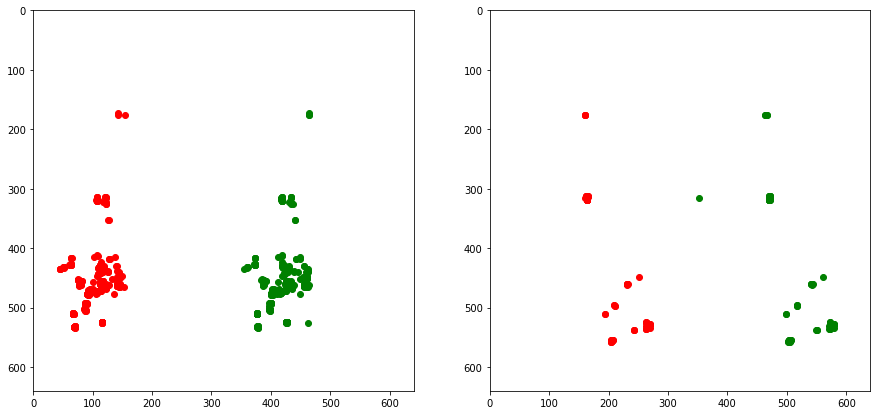

In [65]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
idx = tpt[:,0]<160 # top_f camera only
tptf = tpt[idx,:]
bptf = bpt[idx,:]
plt.subplot(121); plt.scatter(tptf[:,0], tptf[:,1], c='red'); plt.scatter(bptf[:,0]+320, tptf[:,1], c='green');
plt.axis('scaled'); plt.axis([0, 640, 0, 640]);  plt.gca().invert_yaxis();

idx = tpt[:,0]>=160 # top_b camera only
tptb = tpt[idx,:]
bptb = bpt[idx,:]
plt.subplot(122); plt.scatter(tptb[:,0], tptb[:,1], c='red'); plt.scatter(bptb[:,0]+320, tptb[:,1], c='green');
plt.axis('scaled'); plt.axis([0, 640, 0, 640]);  plt.gca().invert_yaxis();

-9.599998474121094
-13.824005126953125


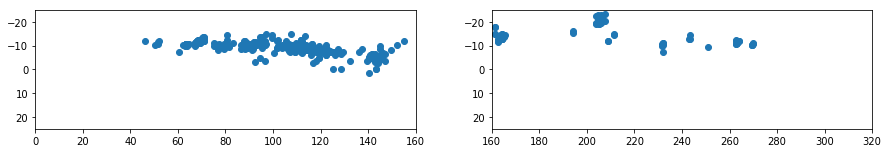

In [68]:
matplotlib.rcParams['figure.figsize'] = [15,15]
dx = bptf[:,0] -  tptf[:,0]
print(np.median(dx))
plt.subplot(121); plt.scatter(tptf[:,0], dx); plt.axis('scaled'); plt.axis([0, 160, -25, 25]);  plt.gca().invert_yaxis();
dx = bptb[:,0] -  tptb[:,0]
plt.subplot(122); plt.scatter(tptb[:,0], dx); plt.axis('scaled'); plt.axis([160, 320, -25, 25]);  plt.gca().invert_yaxis();
print(np.median(dx))

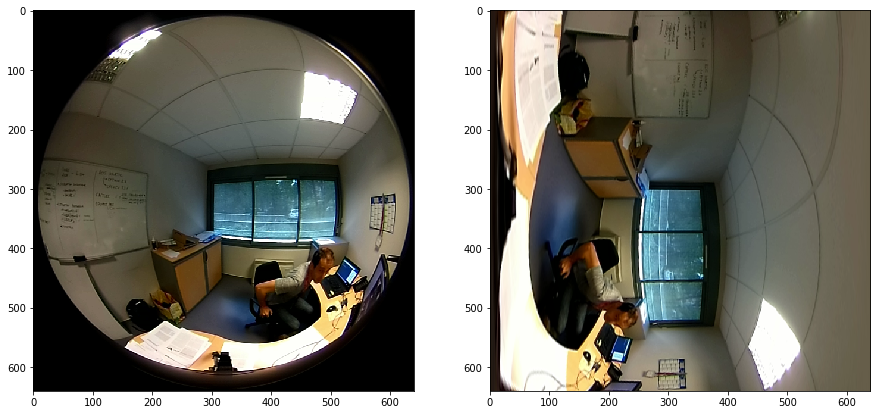

In [55]:
map1_tf, map2_tf = initRectifyMap(K_tf, D_tf, xi_tf)
matplotlib.rcParams['figure.figsize'] = [15, 7]
plt.subplot(121); plot(top_front_img);
top_front_eqimg = equirectangular_projection(top_front_img, map1_tf, map2_tf)
plt.subplot(122); plot(rotate_cw_90(top_front_eqimg));

In [56]:
hm1 = map1_tf[6:634,:]
hm2 = map2_tf[6:634,:]

In [57]:
hm1 = cv2.resize(hm1, (640,640))
hm2 = cv2.resize(hm2, (640,640))

In [58]:
map1_tf = hm1
map2_tf = hm2

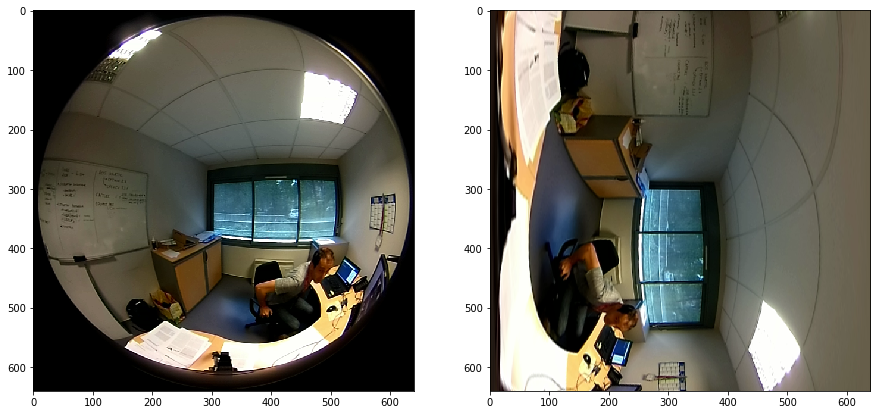

In [59]:
plt.subplot(121); plot(top_front_img);
top_front_eqimg = equirectangular_projection(top_front_img, map1_tf, map2_tf)
plt.subplot(122); plot(rotate_cw_90(top_front_eqimg));

In [60]:
map1_tb, map2_tb = initRectifyMap(K_tb, D_tb, xi_tb)
hm1 = map1_tb[6:634,:]
hm2 = map2_tb[6:634,:]

In [61]:
hm1 = cv2.resize(hm1, (640,640))
hm2 = cv2.resize(hm2, (640,640))

In [62]:
map1_tb = hm1
map2_tb = hm2

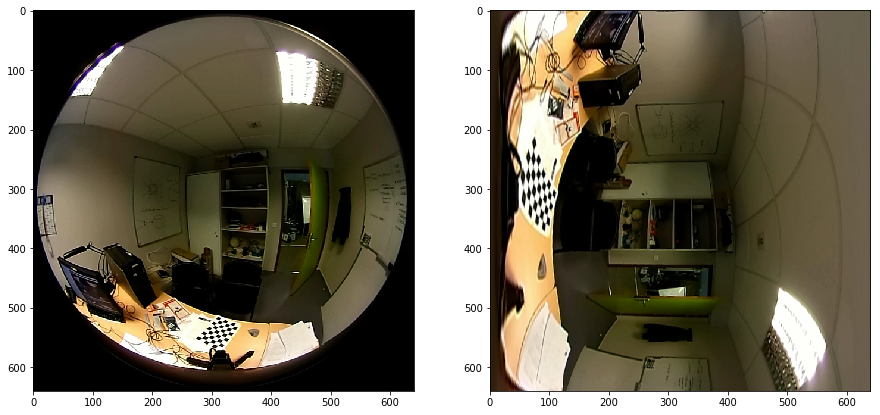

In [63]:
plt.subplot(121); plot(top_back_img);
top_back_eqimg = equirectangular_projection(top_back_img, map1_tb, map2_tb)
plt.subplot(122); plot(rotate_cw_90(top_back_eqimg));

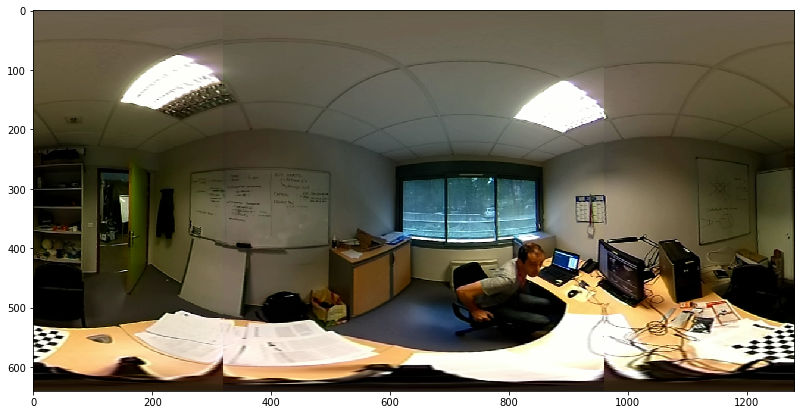

In [64]:
top_both_eqimg = np.concatenate((top_front_eqimg, top_back_eqimg), axis=1)
top_panorama = np.roll(top_both_eqimg, 320, axis=1)
plot(top_panorama);

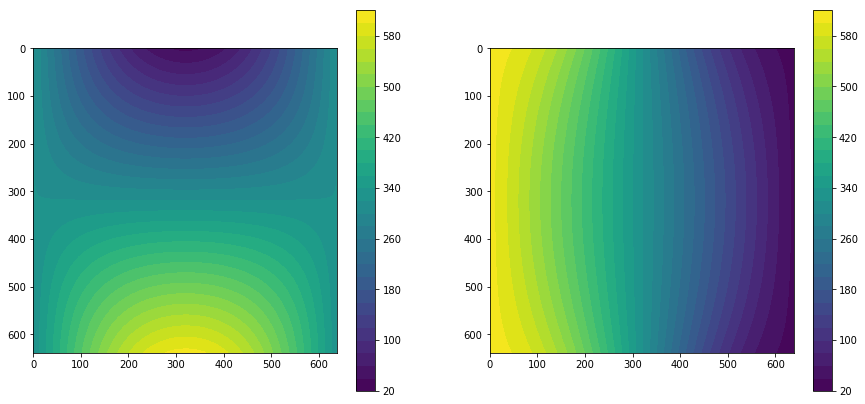

In [67]:
matplotlib.rcParams['figure.figsize'] = [15, 7]
plt.subplot(121); plt.contourf(map1_tf, 32); plt.gca().invert_yaxis(); plt.axis('scaled'); plt.colorbar();
plt.subplot(122); plt.contourf(map2_tf, 32); plt.gca().invert_yaxis(); plt.axis('scaled'); plt.colorbar();